In [274]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
# import pandas as pd
# import missingno as msno
# import numpy as np
from sklearn.impute import SimpleImputer

In [275]:
dataset = pd.read_csv('Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021.csv',delimiter=',')
dataset

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121.0,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89.0,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98.0,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102.0,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


In [276]:
# Menghapus baris yang mengandung nilai yang hilang dari kolom "pm25"
dataset.dropna(subset=['pm25'], inplace=True)


In [277]:
from sklearn.preprocessing import LabelEncoder

laen = LabelEncoder()
dataset['critical'] = laen.fit_transform(dataset['critical'])
dataset['categori'] = laen.fit_transform(dataset['categori'])


In [278]:
dataset.dtypes

tanggal      object
pm10          int64
pm25        float64
so2           int64
co            int64
o3            int64
no2           int64
max           int64
critical      int32
categori      int32
location     object
dtype: object

In [279]:
dataset.describe()

,pm10,pm25,so2,co,o3,no2,max,critical,categori
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,61.389222,94.694611,51.134731,14.526946,50.461078,30.413174,95.368263,1.973054,1.398204
std,14.771269,24.153839,7.883334,4.940869,11.992865,9.803012,24.484947,0.283466,0.508306
min,19.000000,33.000000,38.000000,7.000000,27.000000,9.000000,45.000000,0.000000,0.000000
25%,54.000000,78.250000,44.000000,11.000000,42.000000,23.000000,79.000000,2.000000,1.000000
50%,62.000000,94.500000,52.000000,13.000000,50.000000,30.000000,95.000000,2.000000,1.000000
75%,68.000000,108.750000,54.000000,17.000000,57.000000,36.000000,109.000000,2.000000,2.000000
max,179.000000,174.000000,82.000000,44.000000,151.000000,65.000000,179.000000,4.000000,2.000000


In [280]:
missing = dataset.isnull().sum()
missing

tanggal     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
location    0
dtype: int64

In [281]:
dataset.drop(columns=['tanggal'], inplace=True)

<Axes: >

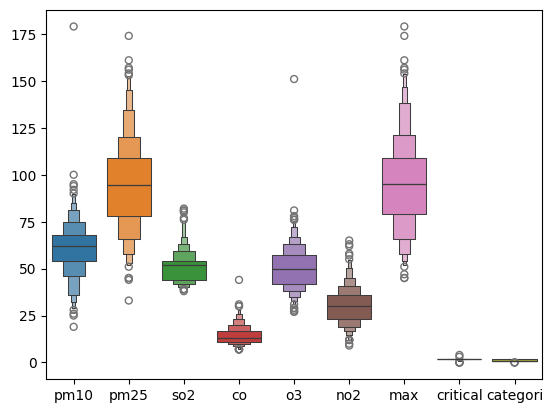

In [282]:
sns.boxenplot(data=dataset)

In [283]:
def ilang(df, column, lower_quantile, upper_quantile):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    
    IQR = upper_bound - lower_bound

    down = lower_bound - (1.5 * IQR) 
    up = upper_bound + (1.5 * IQR)

    # Menghapus outliers
    df_filtered = df[(df[column] >= down) & (df[column] <= up)]
    
    # Update outlier dengan rata-rata
    mean_sib = df_filtered[column].mean()
    df.loc[(df[column] < down) | (df[column] > up), column] = mean_sib
    
    # Jangan lakukan visualisasi di dalam fungsi
    sns.boxplot(y=column, data=df)
    plt.show()
    print("Jumlah Data :",len(df_filtered))
    
    # Kembalikan dataframe yang sudah difilter
    return df_filtered


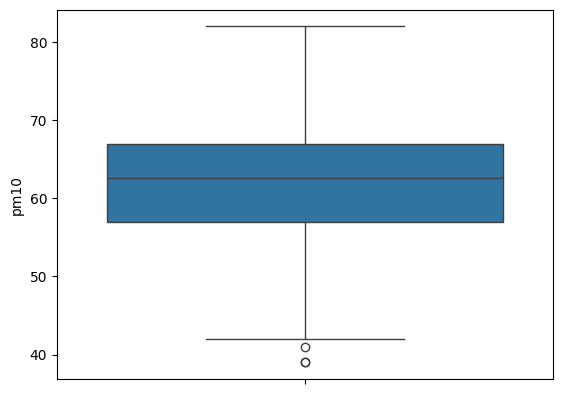

Jumlah Data : 290


In [284]:
nganu = ilang(dataset,'pm10',0.27,0.65)

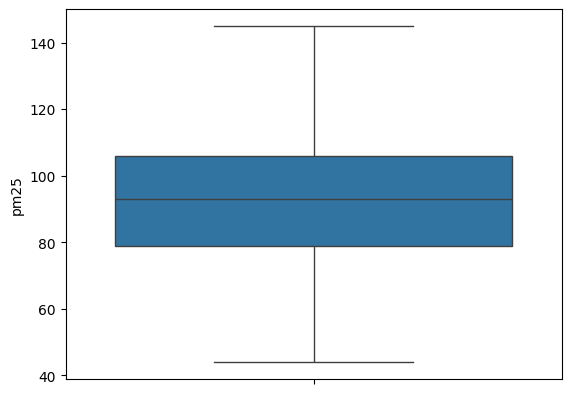

Jumlah Data : 323


In [285]:
pm25=ilang(dataset,'pm25',0.25,0.70)

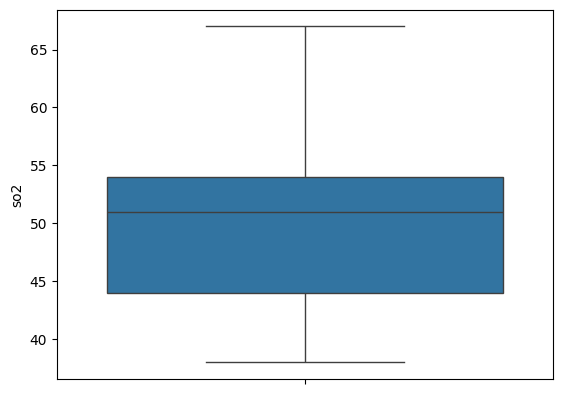

Jumlah Data : 326


In [286]:
so2=ilang(dataset,'so2',0.30,0.76)

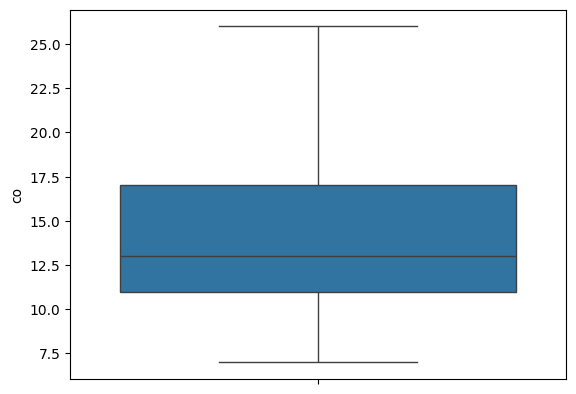

Jumlah Data : 326


In [287]:
co=ilang(dataset,'co',0.25,0.75)

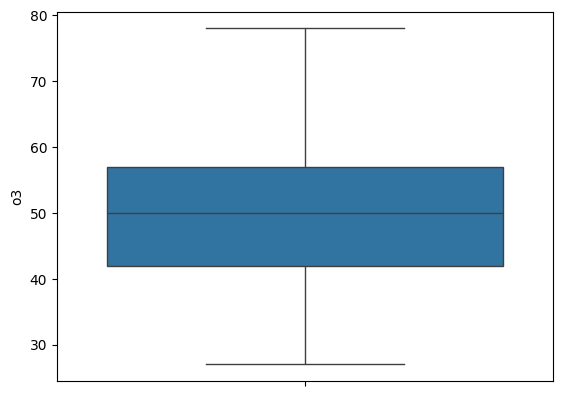

Jumlah Data : 332


In [288]:
o3=ilang(dataset,'o3',0.25,0.75)

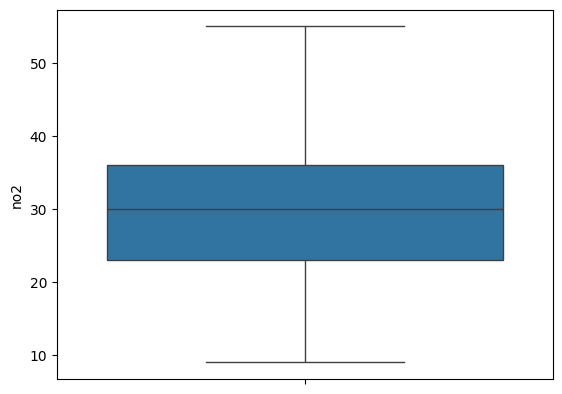

Jumlah Data : 329


In [289]:
no2=ilang(dataset,'no2',0.25,0.75)

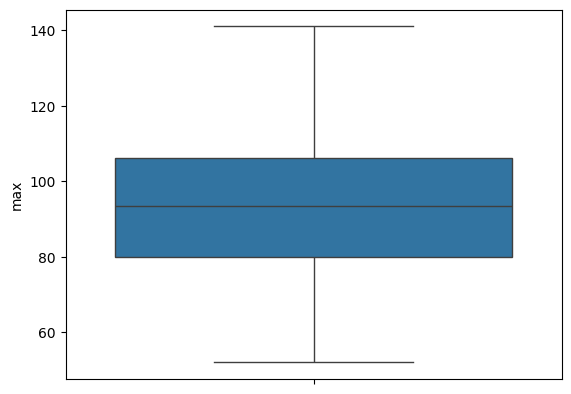

Jumlah Data : 316


In [290]:
max=ilang(dataset,'max',0.35,0.75)

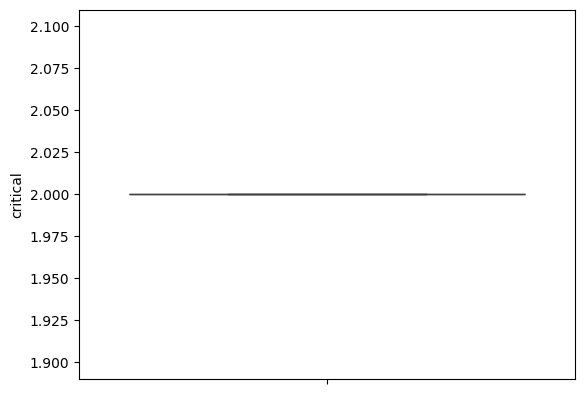

Jumlah Data : 325


In [291]:
crit=ilang(dataset,'critical',0.25,0.75)

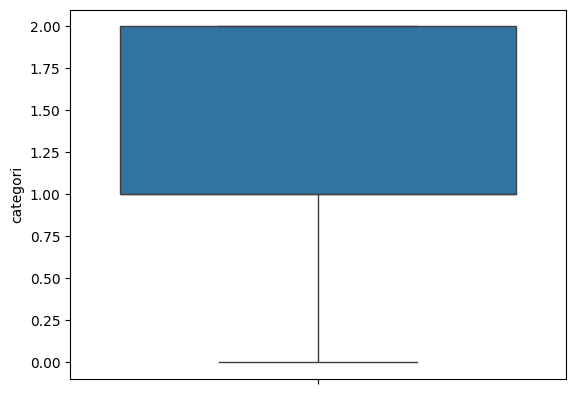

Jumlah Data : 334


In [292]:
cat=ilang(dataset,'categori',0.25,0.75)

<Axes: >

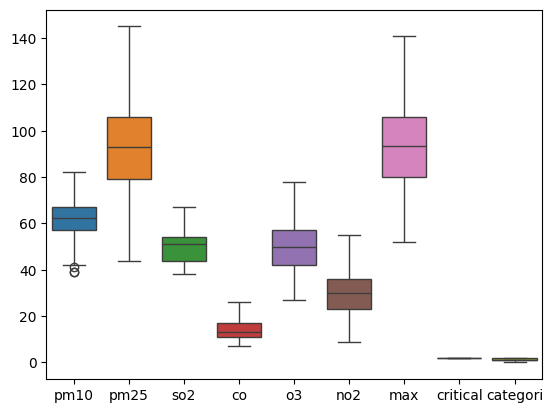

In [293]:
sns.boxplot(data=dataset)

In [303]:
x = nganu.iloc[:, :-1]
y = nganu.iloc[:, -2].values

print(x)


     pm10   pm25  so2  co  o3  no2  max  critical  categori
31     73  126.0   38  26  46   34  126         2         2
32     53   70.0   40  14  55   25   70         2         1
40     50   64.0   40  13  49   16   64         2         1
42     63   98.0   43  16  33   42   98         2         1
43     59   89.0   40  12  40   16   89         2         1
..    ...    ...  ...  ..  ..  ...  ...       ...       ...
360    75  121.0   61  23  40   47  121         2         2
361    59   89.0   53  16  34   33   89         2         1
362    61   98.0   54  15  37   29   98         2         1
363    60  102.0   53  17  38   44  102         2         2
364    64   90.0   52  44  37   53   90         2         1

[290 rows x 9 columns]


In [295]:
print(y)

[2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 2 2 1 2 2
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2 1 2 1 2 1 2 2 2 2 1 1 1 2
 1 1 2 2 1 2 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2
 2 2 1 1 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 2 1 2 2 1 2 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1
 1 2 1 2 2 2 1 1 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 2 1]


In [296]:
# Split data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [297]:
# standarlisasi fitur
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# inisialisasi model svm
svm_model = SVC(kernel='linear',random_state=42)

# latih model
svm_model.fit(X_train, y_train)

# buat prediksi
y_prend = svm_model.predict(X_test)

# evaluasi model
accuracy = accuracy_score (y_test, y_prend)
print(f'accuracy: {accuracy}')

accuracy: 0.9827586206896551


In [298]:
x = nganu.iloc[:, :-3]
y_category = nganu.iloc[:, -2].values
from sklearn.model_selection import train_test_split

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(x, y_category, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

Scaler_cat = StandardScaler()
X_train_cat = Scaler_cat.fit_transform(X_train_cat)
X_test_cat = Scaler_cat.transform(X_test_cat)

from sklearn.svm import SVC

svm_model_cat = SVC(kernel='linear', random_state=42)
svm_model_cat.fit(X_train_cat, y_train_cat)

from sklearn.metrics import accuracy_score

y_pred_cat = svm_model_cat.predict(X_test_cat)
accuracy_cat = accuracy_score(y_test_cat, y_pred_cat)
print(f'accuracy (category): {accuracy_cat}')

import pickle
with open('svm_model_category.pkl', 'wb') as model_file:
    pickle.dump(svm_model_cat, model_file)

with open('scaler_category.pkl', 'wb') as scaler_file:
    pickle.dump(Scaler_cat, scaler_file)




accuracy (category): 0.9827586206896551


In [299]:
import pickle

with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(Scaler, scaler_file)